In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict as OD
from scipy.stats.distributions import chi2
plt.rcParams['font.family']='serif'
plt.rcParams['font.weight']='light'
plt.rcParams['font.size']=14
figsize = (12,8)

def HepHist(bins,hist,yerr,xtrim=False,color='blue',label='',norm=False,fill=False,alpha=0.1):
    ls = '-'
    lw = 2
    plt.rcParams['hatch.color'] = color

    bin_edges = [b for b in bins]; bin_edges.append(bin_edges[-1]+bin_edges[-1]-bin_edges[-2])
    bin_edges = np.array(bin_edges)
    bin_center = [(bin_edges[i] + bin_edges[i+1])/2. for i in range(len(bin_edges)-1)]
    xerr = (bin_center[1]-bin_center[0])/2.
    plt.step(bin_edges[:-1],hist,where='post',color=color,linestyle=ls,lw=lw,label=label)
    plt.errorbar(bin_center,hist,xerr=xerr,fmt='.',color=color,lw=lw)
    plt.errorbar(bin_center,hist,yerr=yerr,fmt='.',color=color,lw=lw,capsize=3,elinewidth=1)
    if fill:      
        xfill = []
        yfill = []
        for x in bin_edges:
            xfill.append(x)
            xfill.append(x)
        for y in hist:
            yfill.append(y)
            yfill.append(y)    
        xfill = xfill[1:-1]
        plt.fill_between(xfill,0,yfill,facecolor=color,alpha=alpha,lw=0)
    plt.plot([bin_edges[0],bin_edges[0]],[0,hist[0]],color=color,ls=ls,lw=lw)
    plt.plot([bin_edges[-1],bin_edges[-1]],[0,hist[-1]],color=color,ls=ls,lw=lw)
    if xtrim: xlims = [bin_edges[0],bin_edges[-1]]; plt.xlim(xlims)
    if hist.max() > plt.gca().get_ylim()[1]*0.9: plt.gca().set_ylim(top=hist.max()*1.1)
    plt.gca().set_ylim(bottom=0)
    plt.grid(ls='--')

def Hist(data,nbins,xlims):
    hist, bin_edges = np.histogram(data,bins=nbins,range=xlims)
    bin_center = [(bin_edges[i] + bin_edges[i+1])/2. for i in range(len(bin_edges)-1)]
    yerr = np.sqrt(hist)
    return bin_edges[:-1], hist, yerr
    
def DifferencePlot(values1,values2,nbins,xlims,title,xlabel):
    b1,h1,e1 = Hist(values1,nbins,xlims=xlims)
    b2,h2,e2 = Hist(values2,nbins,xlims=xlims)

    # Calculate residuals
    res = h2-h1
    eres = np.sqrt(np.power(e1,2.) + np.power(e2,2.))
    chi = 0
    nbins = 0
    for n,d in zip(res,h2):
        if d > 20:
            chi += np.power(n,2.)/float(d)
            nbins += 1
    redchi = chi/float(nbins-1)
    pval = chi2.sf(chi,nbins-1)

    # Renormalize residuals for plotting
    normRes = np.array([i_res/float(i_eres) if i_eres!=0 else 0  for i_res,i_eres in zip(res,eres)])
    normErr = [1 if r!=0 else 0 for r in normRes]
    
    # Make plots
    fig,ax = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [2, 1]}, figsize=figsize)
    plt.suptitle(title)

    plt.sca(ax[0])
    HepHist(b1,h1,e1,color='C0',label='GSL_RNG',xtrim=True,fill=True)
    HepHist(b2,h2,e2,color='C1',label='CLHEP_RNG',xtrim=True,fill=True)
    plt.legend(loc='best')

    plt.sca(ax[1])
#     HepHist(b1,res,eres,color='C2',label='Difference',xtrim=True,fill=True)
    HepHist(b1,normRes,normErr,color='C2',label='Difference',xtrim=True,fill=True)
    plt.plot(0,0,lw=0,color='black',label=r' $\chi^2$/d.o.f.: %.2f' %(redchi))
    plt.axhline(0,ls='-',color='black')
    plt.legend(loc='best')
    ylim = max(abs(normRes))+2
    plt.ylim(-ylim,ylim)

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.xlabel(xlabel)
    plt.show()

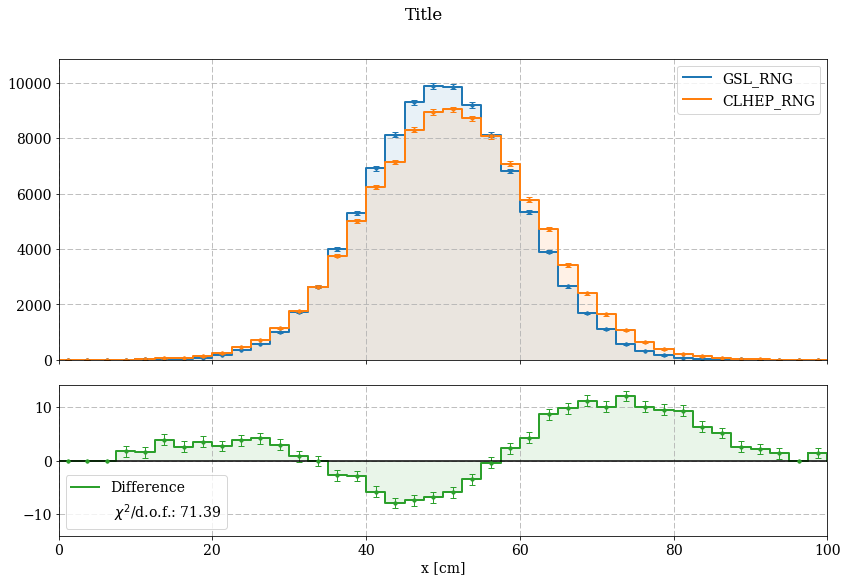

In [17]:
sigDistance = np.random.normal(loc=50,scale=10,size=100000)
bkgDistance = np.random.normal(loc=51,scale=11,size=100000)
nbins = 40
xlims = [0,100]

DifferencePlot(sigDistance,bkgDistance,nbins,xlims,'Title','x [cm]')